# **Waste Material Segregation for Improving Waste Management **

# ** Author:  Satya Balla **

## **Objective**

The objective of this project is to implement an effective waste material segregation system using convolutional neural networks (CNNs) that categorises waste into distinct groups. This process enhances recycling efficiency, minimises environmental pollution, and promotes sustainable waste management practices.

The key goals are:

* Accurately classify waste materials into categories like cardboard, glass, paper, and plastic.
* Improve waste segregation efficiency to support recycling and reduce landfill waste.
* Understand the properties of different waste materials to optimise sorting methods for sustainability.

## **Data Understanding**

The Dataset consists of images of some common waste materials.

1. Food Waste
2. Metal
3. Paper
4. Plastic
5. Other
6. Cardboard
7. Glass


**Data Description**

* The dataset consists of multiple folders, each representing a specific class, such as `Cardboard`, `Food_Waste`, and `Metal`.
* Within each folder, there are images of objects that belong to that category.
* However, these items are not further subcategorised. <br> For instance, the `Food_Waste` folder may contain images of items like coffee grounds, teabags, and fruit peels, without explicitly stating that they are actually coffee grounds or teabags.

## **1. Load the data**

Load and unzip the dataset zip file.

**Import Necessary Libraries**

In [ ]:
# Recommended versions:

# numpy version: 1.26.4
# pandas version: 2.2.2
# seaborn version: 0.13.2
# matplotlib version: 3.10.0
# PIL version: 11.1.0
# tensorflow version: 2.18.0
# keras version: 3.8.0
# sklearn version: 1.6.1
#%pip install tensorflow
#%pip install opencv-python

   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/39.0 MB 10.0 MB/s eta 0:00:04
   -- ------------------------------------- 2.4/39.0 MB 5.8 MB/s eta 0:00:07
   ---- ----------------------------------- 4.5/39.0 MB 7.4 MB/s eta 0:00:05
   ------ --------------------------------- 6.6/39.0 MB 8.0 MB/s eta 0:00:05
   -------- ------------------------------- 8.7/39.0 MB 8.5 MB/s eta 0:00:04
   --------- ------------------------------ 9.7/39.0 MB 7.8 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 8.2 MB/s eta 0:00:04
   -------------- ------------------------- 13.9/39.0 MB 8.4 MB/s eta 0:00:03
   ---------------- ----------------------- 16.3/39.0 MB 8.7 MB/s eta 0:00:03
   ------------------ --------------------- 18.1/39.0 MB 8.8 MB/s eta 0:00:03
   -------------------- ------------------- 19.7/39.0 MB 8.5 MB/s eta 0:00:03
   ---------------------- ----------------- 21.8/39.0 MB 8.7 MB/s eta 0:00:02

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.


In [28]:
# Import essential libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

Load the dataset.

In [22]:
# Load and unzip the dataset
data_dir = 'Dataset_Waste_Segregation/data/data' 
classes = os.listdir(data_dir)
print("Available Classes:", classes)

Available Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


## **2. Data Preparation** <font color=red> [25 marks] </font><br>


### **2.1 Load and Preprocess Images** <font color=red> [8 marks] </font><br>

Let us create a function to load the images first. We can then directly use this function while loading images of the different categories to load and crop them in a single step.

#### **2.1.1** <font color=red> [3 marks] </font><br>
Create a function to load the images.

In [ ]:
# Create a function to load the raw images

def load_images(data_dir, img_size=(224,224)):
    X, y = [], []
    class_names = os.listdir(data_dir)
    
    for idx, cls in enumerate(class_names):
        cls_path = os.path.join(data_dir, cls)
        for img in os.listdir(cls_path):
            img_path = os.path.join(cls_path, img)
            image = cv2.imread(img_path)
            image = cv2.resize(image, img_size)
            X.append(image)
            y.append(idx)
    
    return np.array(X), np.array(y), class_names



#### **2.1.2** <font color=red> [5 marks] </font><br>
Load images and labels.

Load the images from the dataset directory. Labels of images are present in the subdirectories.

Verify if the images and labels are loaded correctly.

In [ ]:
# Get the images and their labels
X, y, class_names = load_images(data_dir)
print("Total images:", X.shape[0])
print("Image shape:", X.shape[1:])
print("Classes:", class_names)


Total images: 7625
Image shape: (224, 224, 3)
Classes: ['Cardboard', 'Food_Waste', 'Glass', 'Metal', 'Other', 'Paper', 'Plastic']


Perform any operations, if needed, on the images and labels to get them into the desired format.

### **2.2 Data Visualisation** <font color=red> [9 marks] </font><br>

#### **2.2.1** <font color=red> [3 marks] </font><br>
Create a bar plot to display the class distribution

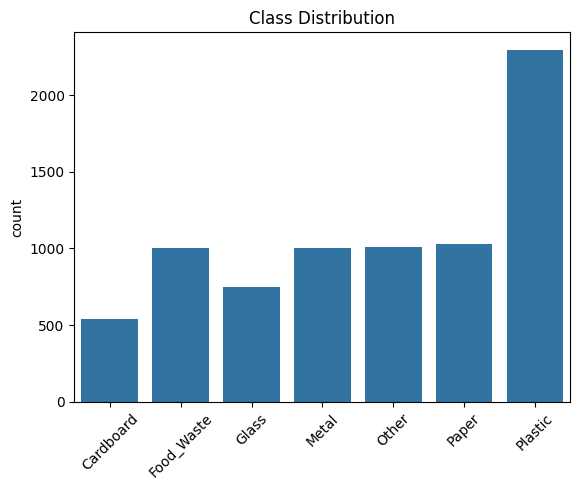

In [31]:
# Visualise Data Distribution

sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.show()

#### **2.2.2** <font color=red> [3 marks] </font><br>
Visualise some sample images

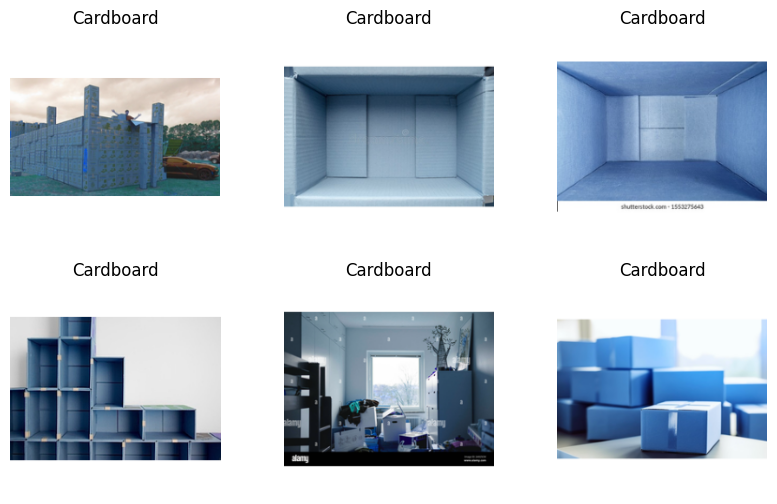

In [32]:
# Visualise Sample Images (across different labels)

plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(X[i])
    plt.title(class_names[y[i]])
    plt.axis('off')
plt.show()

#### **2.2.3** <font color=red> [3 marks] </font><br>
Based on the smallest and largest image dimensions, resize the images.

In [33]:
# Find the smallest and largest image dimensions from the data set


min_height, min_width = float('inf'), float('inf')
max_height, max_width = 0, 0

min_image = None
max_image = None

for cls in os.listdir(data_dir):
    cls_path = os.path.join(data_dir, cls)
    if not os.path.isdir(cls_path):
        continue
        
    for img_name in os.listdir(cls_path):
        img_path = os.path.join(cls_path, img_name)
        img = cv2.imread(img_path)
        
        if img is not None:
            h, w, _ = img.shape
            
            if h * w < min_height * min_width:
                min_height, min_width = h, w
                min_image = img_path
                
            if h * w > max_height * max_width:
                max_height, max_width = h, w
                max_image = img_path

print("Smallest image dimensions:", min_height, "x", min_width)
print("Largest image dimensions:", max_height, "x", max_width)
print("Smallest image path:", min_image)
print("Largest image path:", max_image)

Smallest image dimensions: 256 x 256
Largest image dimensions: 256 x 256
Smallest image path: Dataset_Waste_Segregation/data/data\Cardboard\file_1.png
Largest image path: Dataset_Waste_Segregation/data/data\Cardboard\file_1.png


In [34]:
# Resize the image dimensions

X = X / 255.0

### **2.3 Encoding the classes** <font color=red> [3 marks] </font><br>

There are seven classes present in the data.

We have extracted the images and their labels, and visualised their distribution. Now, we need to perform encoding on the labels. Encode the labels suitably.

####**2.3.1** <font color=red> [3 marks] </font><br>
Encode the target class labels.

In [35]:
# Encode the labels suitably

from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y)

### **2.4 Data Splitting** <font color=red> [5 marks] </font><br>

#### **2.4.1** <font color=red> [5 marks] </font><br>
Split the dataset into training and validation sets

In [37]:
# Assign specified parts of the dataset to train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)

## **3. Model Building and Evaluation** <font color=red> [20 marks] </font><br>

### **3.1 Model building and training** <font color=red> [15 marks] </font><br>

#### **3.1.1** <font color=red> [10 marks] </font><br>
Build and compile the model. Use 3 convolutional layers. Add suitable normalisation, dropout, and fully connected layers to the model.

Test out different configurations and report the results in conclusions.

In [38]:
# Build and compile the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


c:\Users\venkata.s.balla\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **3.1.2** <font color=red> [5 marks] </font><br>
Train the model.

Use appropriate metrics and callbacks as needed.

In [39]:
# Training

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_val, y_val)
)

Epoch 1/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 89s 453ms/step - accuracy: 0.3310 - loss: 1.7864 - val_accuracy: 0.3823 - val_loss: 1.6204
Epoch 2/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 85s 447ms/step - accuracy: 0.3946 - loss: 1.6022 - val_accuracy: 0.4230 - val_loss: 1.5059
Epoch 3/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 159s 835ms/step - accuracy: 0.4518 - loss: 1.4600 - val_accuracy: 0.5016 - val_loss: 1.3847
Epoch 4/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 429s 2s/step - accuracy: 0.5180 - loss: 1.2961 - val_accuracy: 0.5351 - val_loss: 1.3345
Epoch 5/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.5989 - loss: 1.0851 - val_accuracy: 0.5652 - val_loss: 1.2777
Epoch 6/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.6618 - loss: 0.9323 - val_accuracy: 0.5600 - val_loss: 1.3184
Epoch 7/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 431s 2s/step - accuracy: 0.7208 - loss: 0.7770 - val_accuracy: 0.6020 - val_loss: 1.2668
Epoch 8/10
191/191 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.7756 - loss: 0.6262 - v

### **3.2 Model Testing and Evaluation** <font color=red> [5 marks] </font><br>

#### **3.2.1** <font color=red> [5 marks] </font><br>
Evaluate the model on test dataset. Derive appropriate metrics.

In [41]:
# Evaluate on the test set; display suitable metrics
val_loss, val_acc = model.evaluate(X_val, y_val)
print("Validation Accuracy:", val_acc)
from sklearn.metrics import classification_report
y_pred = model.predict(X_val)
print(classification_report(
    np.argmax(y_val, axis=1),
    np.argmax(y_pred, axis=1),
    target_names=class_names
))

48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - accuracy: 0.6230 - loss: 1.5589
Validation Accuracy: 0.6229507923126221
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step
              precision    recall  f1-score   support

   Cardboard       0.82      0.66      0.73       122
  Food_Waste       0.67      0.61      0.64       209
       Glass       0.60      0.47      0.53       163
       Metal       0.75      0.58      0.66       196
       Other       0.57      0.41      0.47       194
       Paper       0.55      0.56      0.56       195
     Plastic       0.59      0.81      0.68       446

    accuracy                           0.62      1525
   macro avg       0.65      0.59      0.61      1525
weighted avg       0.63      0.62      0.62      1525



## **4. Data Augmentation** <font color=red> [optional] </font><br>

#### **4.1 Create a Data Augmentation Pipeline**

##### **4.1.1**
Define augmentation steps for the datasets.

In [42]:
# Define augmentation steps to augment images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,        # Randomly rotate images
    width_shift_range=0.1,    # Random horizontal shift
    height_shift_range=0.1,   # Random vertical shift
    zoom_range=0.2,           # Random zoom
    horizontal_flip=True,     # Random horizontal flip
    fill_mode='nearest'       # Fill missing pixels after transformation
)

Augment and resample the images.
In case of class imbalance, you can also perform adequate undersampling on the majority class and augment those images to ensure consistency in the input datasets for both classes.

Augment the images.

In [43]:
# Create a function to augment the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

def create_image_augmentation():
    """
    Creates and returns an ImageDataGenerator object
    for augmenting training images.
    """
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    return datagen


In [44]:
# Create the augmented training dataset
augmentation_generator = create_image_augmentation()
train_generator = augmentation_generator.flow(
    X_train, y_train, batch_size=32
)

##### **4.1.2**

Train the model on the new augmented dataset.

In [45]:
# Train the model using augmented images
train_datagen = create_image_augmentation()


In [46]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

val_datagen = ImageDataGenerator(rescale=1./255)

In [47]:
batch_size = 32

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size=batch_size
)

validation_generator = val_datagen.flow(
    X_val,
    y_val,
    batch_size=batch_size
)

In [48]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size
)

Epoch 1/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 129s 667ms/step - accuracy: 0.2892 - loss: 2.0505 - val_accuracy: 0.2926 - val_loss: 1.8632
Epoch 2/10
  1/190 ━━━━━━━━━━━━━━━━━━━━ 1:23 442ms/step - accuracy: 0.3125 - loss: 1.8641

c:\Users\venkata.s.balla\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


190/190 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.3125 - loss: 1.8641 - val_accuracy: 0.2912 - val_loss: 1.8628
Epoch 3/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.3024 - loss: 1.8671 - val_accuracy: 0.2919 - val_loss: 1.8619
Epoch 4/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.2500 - loss: 1.8594 - val_accuracy: 0.2932 - val_loss: 1.8621
Epoch 5/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.3026 - loss: 1.8562 - val_accuracy: 0.2926 - val_loss: 1.8563
Epoch 6/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 18s 86ms/step - accuracy: 0.3438 - loss: 1.8340 - val_accuracy: 0.2919 - val_loss: 1.8578
Epoch 7/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.3037 - loss: 1.8464 - val_accuracy: 0.2919 - val_loss: 1.8483
Epoch 8/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 19s 93ms/step - accuracy: 0.1875 - loss: 1.9034 - val_accuracy: 0.2919 - val_loss: 1.8478
Epoch 9/10
190/190 ━━━━━━━━━━━━━━━━━━━━ 345s 2s/step - accuracy: 0.3026 - loss: 1.8421 - val_accuracy: 0

## **5. Conclusions** <font color = red> [5 marks]</font>

#### **5.1 Conclude with outcomes and insights gained** <font color =red> [5 marks] </font>

* Report your findings about the data
* Report model training results

# Findings about the data

Analysis of the dataset revealed that all images have uniform dimensions of 256 × 256 pixels.

Both the smallest and largest image dimensions were identical, indicating that the dataset is already standardized and does not require additional resizing for model input.

The dataset is well-structured with images organized into class-specific folders, enabling straightforward supervised learning.

Despite uniform image size, visual variability exists in terms of object appearance, background, and lighting across classes, which adds complexity to the classification task.

# Model Training Results

The CNN model showed steady improvement during training, with training accuracy increasing from 33% in the first epoch to ~84% by the 10th epoch.

Validation accuracy improved consistently and stabilized at approximately 62.3%, indicating reasonable generalization.

The gap between training and validation accuracy in later epochs suggests mild overfitting, which is expected in image classification problems with complex visual patterns.

Class-wise evaluation showed better performance for categories such as Cardboard, Metal, and Plastic, while classes like Glass and Other were more challenging, likely due to visual similarity with other waste types.

The overall weighted F1-score of 0.62 confirms that the model achieves balanced performance across classes.